## Lab7

#### Zadanie 1

In [68]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve




##### Power implementation

In [67]:
def power_iteration(A, num_iterations: int = 1000, eps: float = 1e-9):
    # Ideally choose a random vector
    # To decrease the chance that our vector
    # Is orthogonal to the eigenvector
    b_k = np.random.rand(A.shape[1])
    i = 0
    for i in range(num_iterations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1,np.inf)

        # re normalize the vector
        b_k_norm = b_k1 / b_k1_norm
        if np.linalg.norm(b_k_norm-b_k, np.inf) < eps:
            b_k = b_k_norm
            break
        b_k = b_k_norm

    return i,b_k1_norm, (b_k/np.linalg.norm(b_k))

In [66]:
A = np.random.rand(3,3)
eig_value, eig_vectors = np.linalg.eig(A)
iterations, power_value, power_vector = power_iteration(A)
print(f"values\n\n numpy: {eig_value}\n inverse_method: {power_value}\n")
print(f"vectors\n\n numpy: {eig_vectors}\n inverse_method: {power_vector}")

values

 numpy: [ 1.14251588 -0.30629264 -0.50314956]
 inverse_method: 1.142515881082015

vectors

 numpy: [[-0.63592163 -0.93626691  0.23911837]
 [-0.46804606  0.31084981 -0.69786659]
 [-0.61362576  0.16363579  0.67513304]]
 inverse_method: [0.63592163 0.46804605 0.61362576]


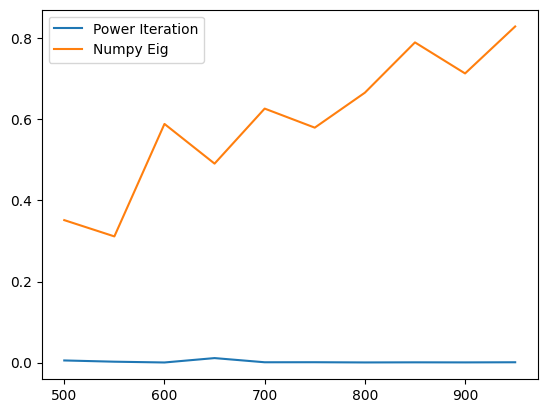

In [6]:
times, sizes = [], []
times_eig = []
for i in range(500, 1000, 50):
    A = np.random.rand(i,i)

    power_time = time.time()
    power_iteration(A)
    power_time = time.time()-power_time

    times.append(power_time)
    sizes.append(i)
    power_time = time.time()
    np.linalg.eig(A)
    power_time = time.time()-power_time
    times_eig.append(power_time)
    

# Draw linear plot
plt.plot(sizes,times)
plt.plot(sizes,times_eig)
plt.legend(['Power Iteration', 'Numpy Eig'])

#### Zadanie 2

##### Inverse power implementation

In [53]:
def inverse_iteration(A,mu,iterations=10000):
    n = A.shape[0]
    b_k = np.random.randn(n)
    b_k = b_k/np.linalg.norm(b_k)
    for i in range(iterations):
        b_k_norm= np.linalg.inv(A-mu*np.eye(n)).dot(b_k)
        b_k  = b_k_norm / np.linalg.norm(b_k_norm)
        norm = b_k.T.dot(A).dot(b_k)
    return(i,norm,b_k)


In [65]:
A = np.random.rand(3,3)
eig_value, eig_vectors = np.linalg.eig(A)
iterations, inverse_value, inverse_vector = inverse_iteration(A,3)
print(f"values\n\n numpy: {eig_value}\n inverse_method: {inverse_value}\n")
print(f"vectors\n\n numpy: {eig_vectors}\n inverse_method: {inverse_vector}")

values

 numpy: [ 0.80540176+0.j         -0.11218909+0.13659781j -0.11218909-0.13659781j]
 inverse_method: 0.8054017588833962

vectors

 numpy: [[ 0.39974412+0.j          0.05921743+0.11172139j  0.05921743-0.11172139j]
 [ 0.81869841+0.j         -0.93288924+0.j         -0.93288924-0.j        ]
 [ 0.41223482+0.j          0.26726373-0.20566815j  0.26726373+0.20566815j]]
 inverse_method: [-0.39974412 -0.81869841 -0.41223482]


##### Rayleigh

In [69]:
def rayleigh_quotient_iteration(A,nb_iterations):
    n = A.shape[0]
    v = np.random.randn(n)
    v = v/np.linalg.norm(v)
    l = v.T.dot(A.dot(v))
    for i in range(nb_iterations):
        w = np.linalg.inv(A-l*np.eye(n)).dot(v)
        v  = w / np.linalg.norm(w)
        l = v.T.dot(A).dot(v)
    return(v,l)

In [71]:
A = np.random.randn(3,3)
A = A.T.dot(A)
rayleigh_quotient_iteration(A,100)

(array([-0.90255286, -0.27914032,  0.32783993]), 2.49417703443778)